# Логистическая регрессия

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_classification
X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

In [3]:
pd.DataFrame(X).head()

,0,1
0,1.863411,0.087646
1,-1.530997,1.901182
2,-0.017224,-2.591112
3,-2.032039,-1.801162
4,4.620555,0.901124


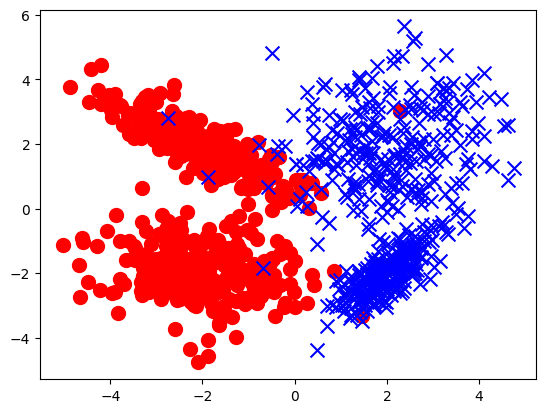

In [4]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)
plt.show()

In [5]:
class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.theta = None
        self._alpha = alpha
        self._n_iters = n_iters
        
    def gradient_step(self, theta, theta_grad):
        return theta - self._alpha * theta_grad
    
    def optimize(self, X, y, start_theta, n_iters):
        theta = start_theta.copy()
        for i in range(n_iters):
            theta_grad = self.grad_func(X, y, theta)
            theta = self.gradient_step(theta, theta_grad)
        return theta
    def fit(self, X, y):
        m = X.shape[1]
        start_theta = np.ones(m)
        self.theta = self.optimize(X, y, start_theta, self._n_iters)

In [6]:
class LogReg(SGD):
    def sigmoid(self, X, theta):        
        return 1. / (1. + np.exp(-X.dot(theta)))
    
    def grad_func(self, X, y, theta):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, theta) - y)
        return grad
    
    def predict_proba(self, X):
        return self.sigmoid(X, self.theta)
    
    def predict(self, X):
        y_pred = self.predict_proba(X) > 0.5
        return y_pred

In [7]:
logreg = LogReg()
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
logreg.fit(X, y)
y_pred = logreg.predict(X)

In [8]:
from sklearn.metrics import accuracy_score, f1_score
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')
y_pred_proba = logreg.predict_proba(X)

accuracy = 0.98 F1-score = 0.98


In [9]:
xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01), 
    np.arange(X.min(axis=0)[2]-1, X.max(axis=0)[2]+1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
XX = np.array([(1, *xx) for xx in XX])

In [10]:
Z = logreg.fit(X,y)
Z = logreg.predict_proba(XX)
Z = Z.reshape(xx.shape)


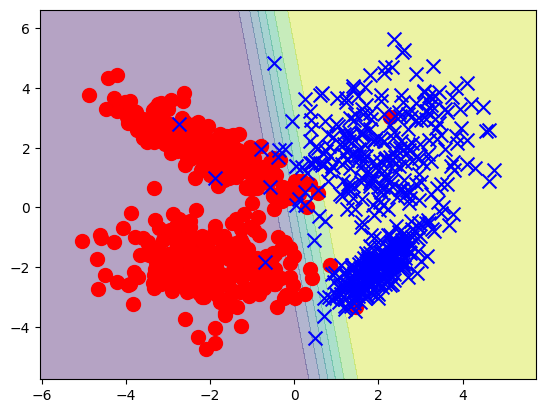

In [11]:
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 1][y==0], X[:, 2][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 1][y==1], X[:, 2][y==1], marker="x", c='b', s=100)

## Задания для самостоятельного выполнения

1. Выведите результаты работы библиотечной модели - в численном и в графическом виде.


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.2)
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [13]:
y_pred = model.predict(X_test)

print('Точность классификатора логистической регрессии на тестовом наборе: {:.2f}'.format(model.score(X_test, y_test)))
print(" Accuracy:",metrics. accuracy_score (y_test, y_pred))

Точность классификатора логистической регрессии на тестовом наборе: 0.97
 Accuracy: 0.975


In [14]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.075590
         Iterations 10
                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: y                Pseudo R-squared: 0.891      
Date:               2025-04-04 00:46 AIC:              157.1808   
No. Observations:   1000             BIC:              171.9041   
Df Model:           2                Log-Likelihood:   -75.590    
Df Residuals:       997              LL-Null:          -693.15    
Converged:          1.0000           LLR p-value:      6.3004e-269
No. Iterations:     10.0000          Scale:            1.0000     
--------------------------------------------------------------------
             Coef.    Std.Err.      z      P>|z|     [0.025   0.975]
--------------------------------------------------------------------
const       -0.2926     0.2251   -1.2999   0.1936   -0.7338   0.1486
x1           3.3866     0.3157   10.7286   0

In [15]:
cnf_matrix = metrics.confusion_matrix (y_test, y_pred)
cnf_matrix

array([[ 92,   3],
       [  2, 103]])

Истинно положительные предсказания: 92

Истинно отрицательные прогнозы: 103

Ложноположительные прогнозы: 2

Ложноотрицательные прогнозы: 3

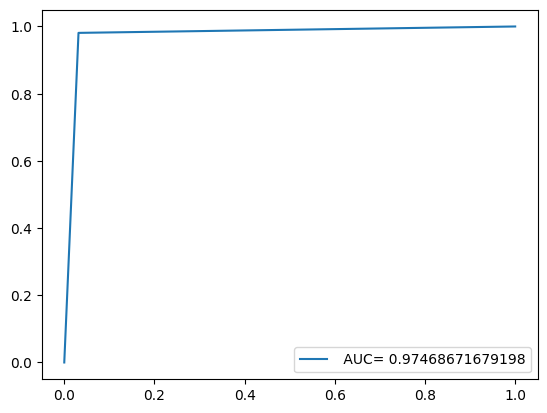

In [16]:
y_pred_proba = model.predict(X_test)
fpr, tpr, _ = metrics. roc_curve (y_test, y_pred_proba)
auc = metrics. roc_auc_score (y_test, y_pred_proba)

#create ROC curve
plt.plot (fpr,tpr,label=" AUC= "+str(auc))
plt.legend(loc=4)
plt.show()

2. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.


3. Модифицируйте код модели таким образом, чтобы фиктивный столбец единиц добавлялся к матрице признаков внутри класса.


In [17]:
class LogReg():
    def __init__(self, alpha, n_iters=1000):
        self.theta = None
        self._alpha = alpha
        self._n_iters = n_iters
        
    def ones(X):
        self._X = np.hstack([np.ones(self._X.shape[0])[:, np.newaxis], self._X])
        
    def gradient_step(self, theta, theta_grad):
        return theta - self._alpha * theta_grad
    
    def optimize(self, X, y, start_theta, n_iters):
        theta = start_theta.copy()
        for i in range(n_iters):
            theta_grad = self.grad_func(X, y, theta)
            theta = self.gradient_step(theta, theta_grad)
        return theta
    
    def fit(self, X, y):
        m = X.shape[1]
        start_theta = np.ones(m)
        self.theta = self.optimize(X, y, start_theta, self._n_iters)
        
    def sigmoid(self, X, theta):
    # Clip the dot product to avoid overflow in exp
        z = X.dot(theta)
        z = np.clip(z, -500, 500)  # Limiting values to prevent overflow
        return 1. / (1. + np.exp(-z))
    
    def grad_func(self, X, y, theta):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, theta) - y)
        return grad
    
    def predict_proba(self, X):
        return self.sigmoid(X, self.theta)
    
    def predict(self, X):
        y_pred = self.predict_proba(X) > 0.5
        return y_pred

In [18]:
for i in  list(np.linspace(-1000, 100000, 40)):
    logreg1 = LogReg(alpha=i)
    X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
    logreg1.fit(X, y)
    y_pred = logreg1.predict(X)
    ac = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    print(f'accuracy = {ac:.2f} F1-score = {f1:.2f} i = {i}')
    y_pred_proba = logreg1.predict_proba(X)


accuracy = 0.03 F1-score = 0.02 i = -1000.0
accuracy = 0.98 F1-score = 0.98 i = 1589.7435897435898
accuracy = 0.98 F1-score = 0.98 i = 4179.48717948718
accuracy = 0.98 F1-score = 0.98 i = 6769.2307692307695
accuracy = 0.98 F1-score = 0.98 i = 9358.97435897436
accuracy = 0.97 F1-score = 0.98 i = 11948.71794871795
accuracy = 0.98 F1-score = 0.98 i = 14538.461538461539
accuracy = 0.98 F1-score = 0.98 i = 17128.20512820513
accuracy = 0.98 F1-score = 0.98 i = 19717.94871794872
accuracy = 0.98 F1-score = 0.98 i = 22307.69230769231
accuracy = 0.97 F1-score = 0.98 i = 24897.4358974359
accuracy = 0.98 F1-score = 0.98 i = 27487.17948717949
accuracy = 0.98 F1-score = 0.98 i = 30076.923076923078
accuracy = 0.98 F1-score = 0.98 i = 32666.66666666667
accuracy = 0.98 F1-score = 0.98 i = 35256.41025641026
accuracy = 0.60 F1-score = 0.72 i = 37846.153846153844
accuracy = 0.98 F1-score = 0.98 i = 40435.89743589744
accuracy = 0.97 F1-score = 0.98 i = 43025.64102564103
accuracy = 0.98 F1-score = 0.98 i = 

4. Поэкспериментируйте с разными значениями параметра class_sep при генерации датасета. Визуализируйте полученные распределения. Сделайте вывод о том, как этот параметр влияет на точность получаемых моделей.


class_sep = 0.1


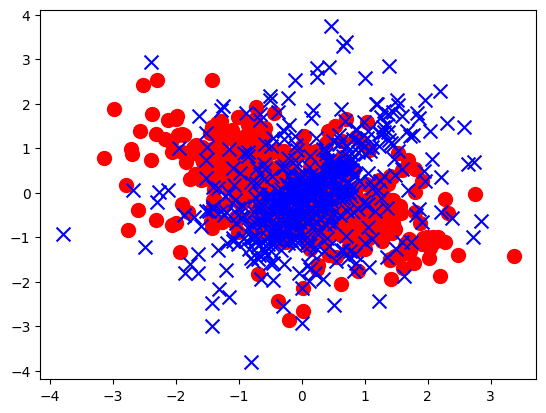

class_sep = 0.9777777777777777


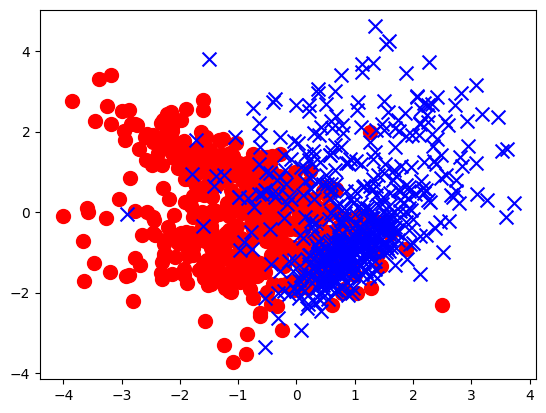

class_sep = 1.8555555555555556


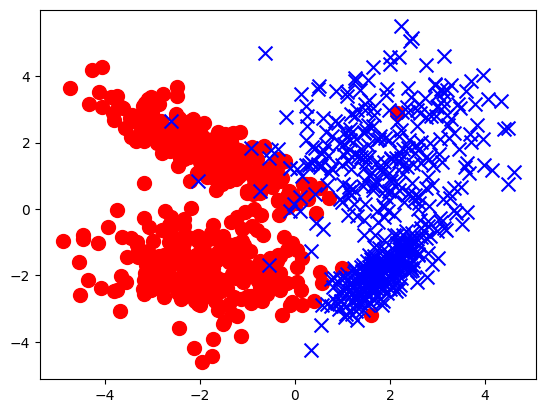

class_sep = 2.7333333333333334


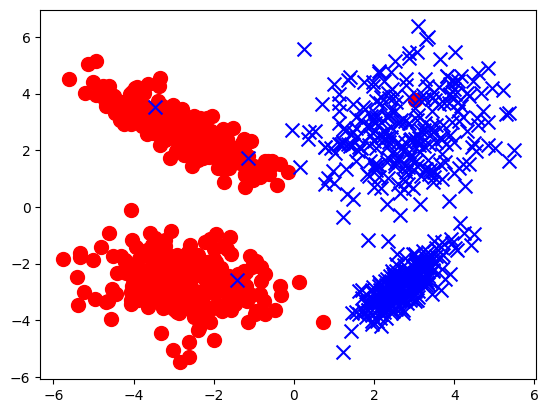

class_sep = 3.611111111111111


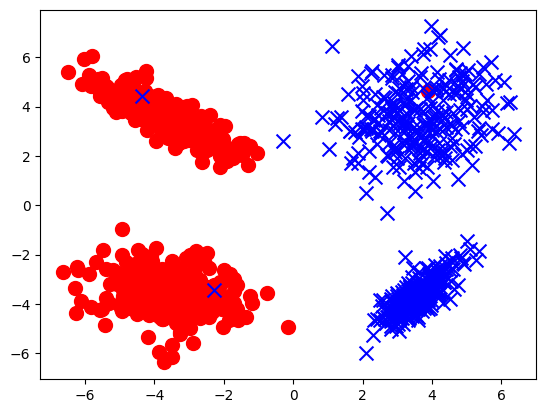

class_sep = 4.488888888888889


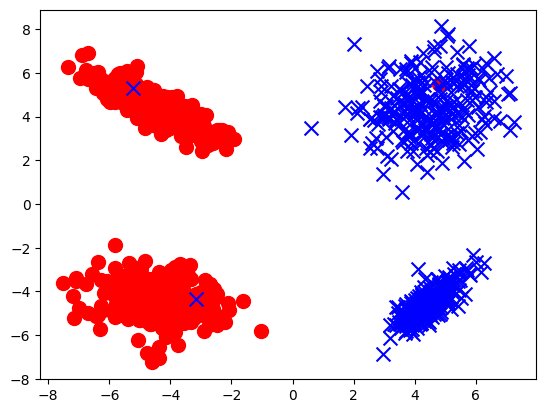

class_sep = 5.366666666666666


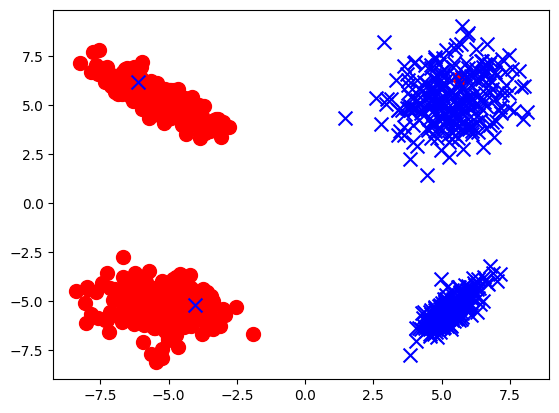

class_sep = 6.244444444444444


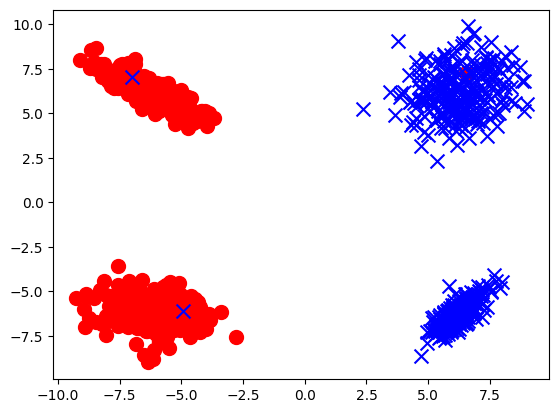

class_sep = 7.122222222222222


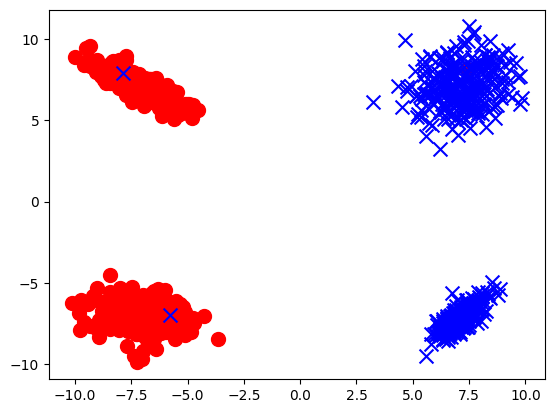

class_sep = 8.0


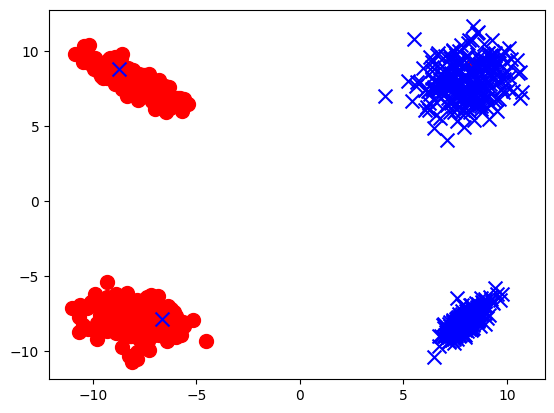

In [19]:
for i in list(np.linspace(0.1,8,10)):
    X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=i,
                          random_state=1)
    print(f'class_sep = {i}')
    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)
    plt.show()

Чем больше зазор (его модуль) между классами, тем меньше точность

5. Сгенерируйте датасет с большим числом признаков и примените к нему созданную модель.


In [20]:
X,y = make_classification (n_samples=1000,
                          n_features=4,
                          n_informative=4,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=i,
                          random_state=1)
logreg2 = LogReg(alpha=0.5)
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
logreg2.fit(X, y)
y_pred = logreg2.predict(X)
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')
y_pred_proba = logreg2.predict_proba(X)

accuracy = 1.00 F1-score = 1.00


6. Сгенерируйте датасет с большим количеством классов и реализуйте в классе алгоритм "один против всех". Решите задачу множественной классификации средствами sklearn.


In [21]:
import pandas as pd 
import sklearn as sk 
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neural_network import MLPClassifier 

In [22]:
X, y = make_classification(n_samples=1000,
                          n_features=4,
                          n_informative=3,
                          n_redundant=1,
                          n_classes=3,
                          class_sep=2,
                          random_state=1)
                          
X_tr, X_test, y_tr, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

LR = LogisticRegression(random_state=0, solver='lbfgs').fit(X_tr, y_tr) 
print(f'Logistic Regression score: {round(LR.score(X_test, y_test), 4)}') 
 
SVM = svm.SVC(decision_function_shape="ovo").fit(X_tr, y_tr) 
print(f'SVC score: {round(SVM.score(X_test, y_test), 4)}')
 
RF = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0).fit(X_tr, y_tr) 
print(f'RandomForestClassifier score: {round(RF.score(X_test, y_test), 4)}')
 
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(150, 10), 
                  random_state=1, max_iter=1000).fit(X_tr, y_tr) 
print(f'MLPClassifier score: {round(NN.score(X_test, y_test), 4)}')

Logistic Regression score: 0.92
SVC score: 0.965
RandomForestClassifier score: 0.975
MLPClassifier score: 0.975


Прогнозная точность:
    
Логистическая регрессия 92% 

Машина опорных векторов 96,5% 

Случайный лес 97,5% 

Нейронная сеть 99%

7. Выведите значения вероятностей для каждого объекта принадлежать тому или иному классу для библиотечной модели LogisticRegression.

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_tr)
X_tr_std = sc.transform(X_tr)
X_test_std = sc.transform(X_test)

lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_tr_std, y_tr)
np.set_printoptions(suppress=True)
lr.predict_proba([X_test_std[0,:]])


array([[0.00042542, 0.04148382, 0.95809076]])

## Контрольные вопросы


1. Сформулируйте, в чем состоит задача классификации, придумайте несколько примеров.


Классификация - это задача машинного обучения, которая выражается в предсказании дискретного значения.

Примеры задач классификации - распознавание объектов, генерация текстов, подбор тематики текстов, идентификация объектов на изображениях, распознавание речи, машинный перевод и так далее.

2. Что такое шаг градиентного спуска?


Согласно определению это размер шага на каждой итерации при движении к минимизации функции потерь.

3. Какая функция используется в качестве функции ошибки в модели логистической регрессии?


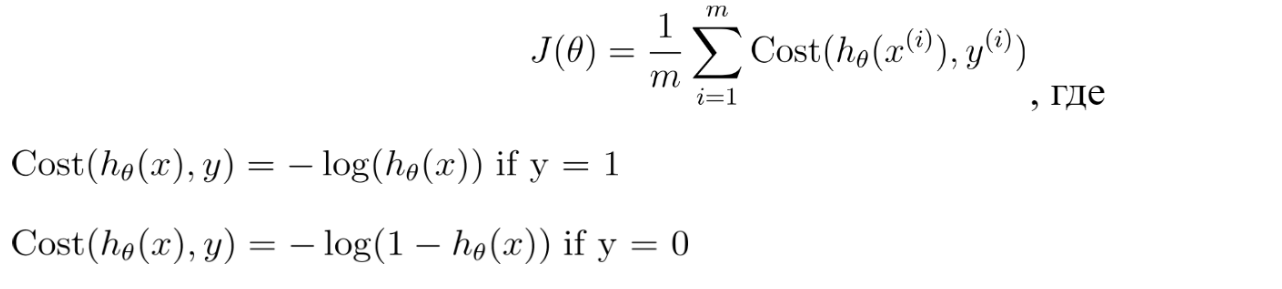

4. Зачем при реализации логистической регрессии к матрице признаков добавлялся столбец из единиц?